In [1]:
using PyPlot # Este es el paquete que uso para graficar

## Euler

Mi Euler va a calcular la solucion desde $x=0$ hasta $x=1$, por simplicidad (para calcular la convergencia del método y estudiar los errores).

Entonces mi tamaño de paso va a ser $h = \frac{1}{N}$, $N$ es el número de pasos.

El intervalo $[0,1]$ va a estar dividido en $N$ partes iguales. Podemos llamar a cada uno de estos puntos $j = 0, 1, 2, ...,N$. El punto $j=0$ va a ser el punto $x=0$. En este punto conocemos la solución $y$, va ser $y(t_0) = y_0$, la condición inicial.

El objetivo va a ser calcular la solución en los otros puntos $j = 1, 2, ...,N$

In [2]:
function Euler(f, t0, y0, N) #mi función se llama Euler, le doy como entradas función, tiempo inic., condición inicial y número de pasos
    h=1/N  #Definiendo h así, estoy diciendo que el intervalo de solucion va a ser [0,1]
    ts = Float64[] #Arreglos de tiempos y de solucion aprox. Son arreglos vacíos
    ys = Float64[]
    t_actual = t0 #Como primer dato le doy el tiempo inicial
    y_actual = y0 #doy como primer dato la condición inicial evaluada en el tiempo inicial (un nuúmero)
    push!(ts, t_actual) #Empujo mi primer dato al arreglo de los tiempos (que antes de hacer esto estaba vacío) 
    push!(ys, y_actual) #Empujo mi primer dato al arreglo de las soluciones aprox (que antes de hacer esto estaba vacío)
    for j in 1:N # voy a hacer exactamente lo mismo en los puntos que en los que NO CONOZCO LA SOLUCIÓN
        t_nueva = t_actual + h #actualizo el tiempo, le sumo un h
        y_nueva = y_actual + f(t_actual, y_actual)*h #Calculo la aproximación a la solución (EN ESTA PARTE USO EULER)
        push!(ts, t_nueva) #empujo los nuevos datos (tiempos y solucion aprox) a los arreglos
        push!(ys, y_nueva)
        t_actual = t_nueva #actualizo los datos para volver a empezar el ciclo
        y_actual = y_nueva
    end
    ts, ys #al final devuelve 2 arreglos, los tiempos y la solución en estos tiempos
end

Euler (generic function with 1 method)

Defino mi función de prueba $f$, con esta voy a trabajar

In [3]:
f(t, y) = 2y -1 #esta es mi función de prueba

f (generic function with 1 method)

## Gráfica de la solución aproximada (obtenida por Euler)

In [4]:
Datos = Euler(f, 0, 1, 2^6) #Aplico mi función Euler al punto t0 = 0, y0 = 1. El resultado lo guardo en el arreglo Datos

([0.0, 0.015625, 0.03125, 0.046875, 0.0625, 0.078125, 0.09375, 0.109375, 0.125, 0.140625  …  0.859375, 0.875, 0.890625, 0.90625, 0.921875, 0.9375, 0.953125, 0.96875, 0.984375, 1.0], [1.0, 1.015625, 1.03173828125, 1.0483551025390625, 1.0654911994934082, 1.0831627994775772, 1.1013866369612515, 1.1201799693662906, 1.1395605934089872, 1.159546861953018  …  3.2163635240291315, 3.301249884155042, 3.388788943034887, 3.479063597504727, 3.57215933492675, 3.668164314143211, 3.7671694489601864, 3.8692684942401923, 3.974558134685198, 4.0831380763941105])

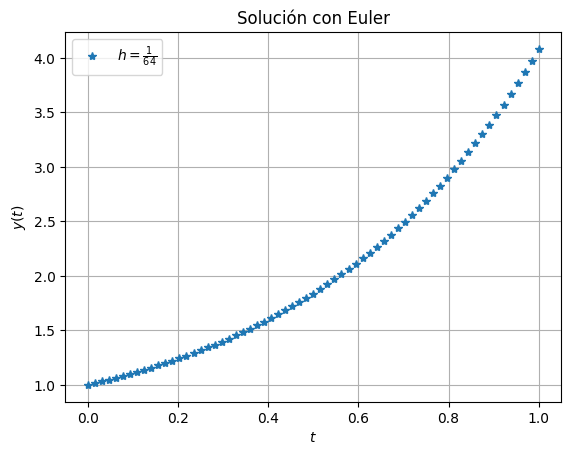

In [5]:
plot(Datos[1], Datos[2], "*", label=L"h=\frac{1}{64}")
title("Solución con Euler")
xlabel(L"t")
ylabel(L"y(t)")
legend()
grid("on");

## Solución Exacta

Vamos a graficar la solución exacta (que se obtiene por separación de variables).

In [6]:
N = 64
us = range(0, stop=1, length=N+1) #Aquí length es el número total de puntos j=0,1,2,...,N (SON N+1 PUNTOS)
vs = [0.5 + 0.5*exp(2x) for x in us];

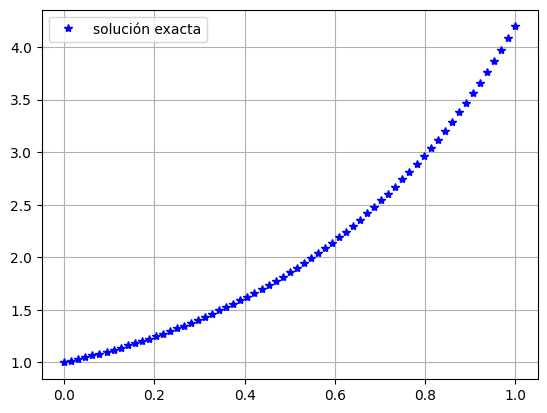

In [7]:
plot(us, vs, "b*", label="solución exacta")
grid("on")
legend();

## Comparaciones

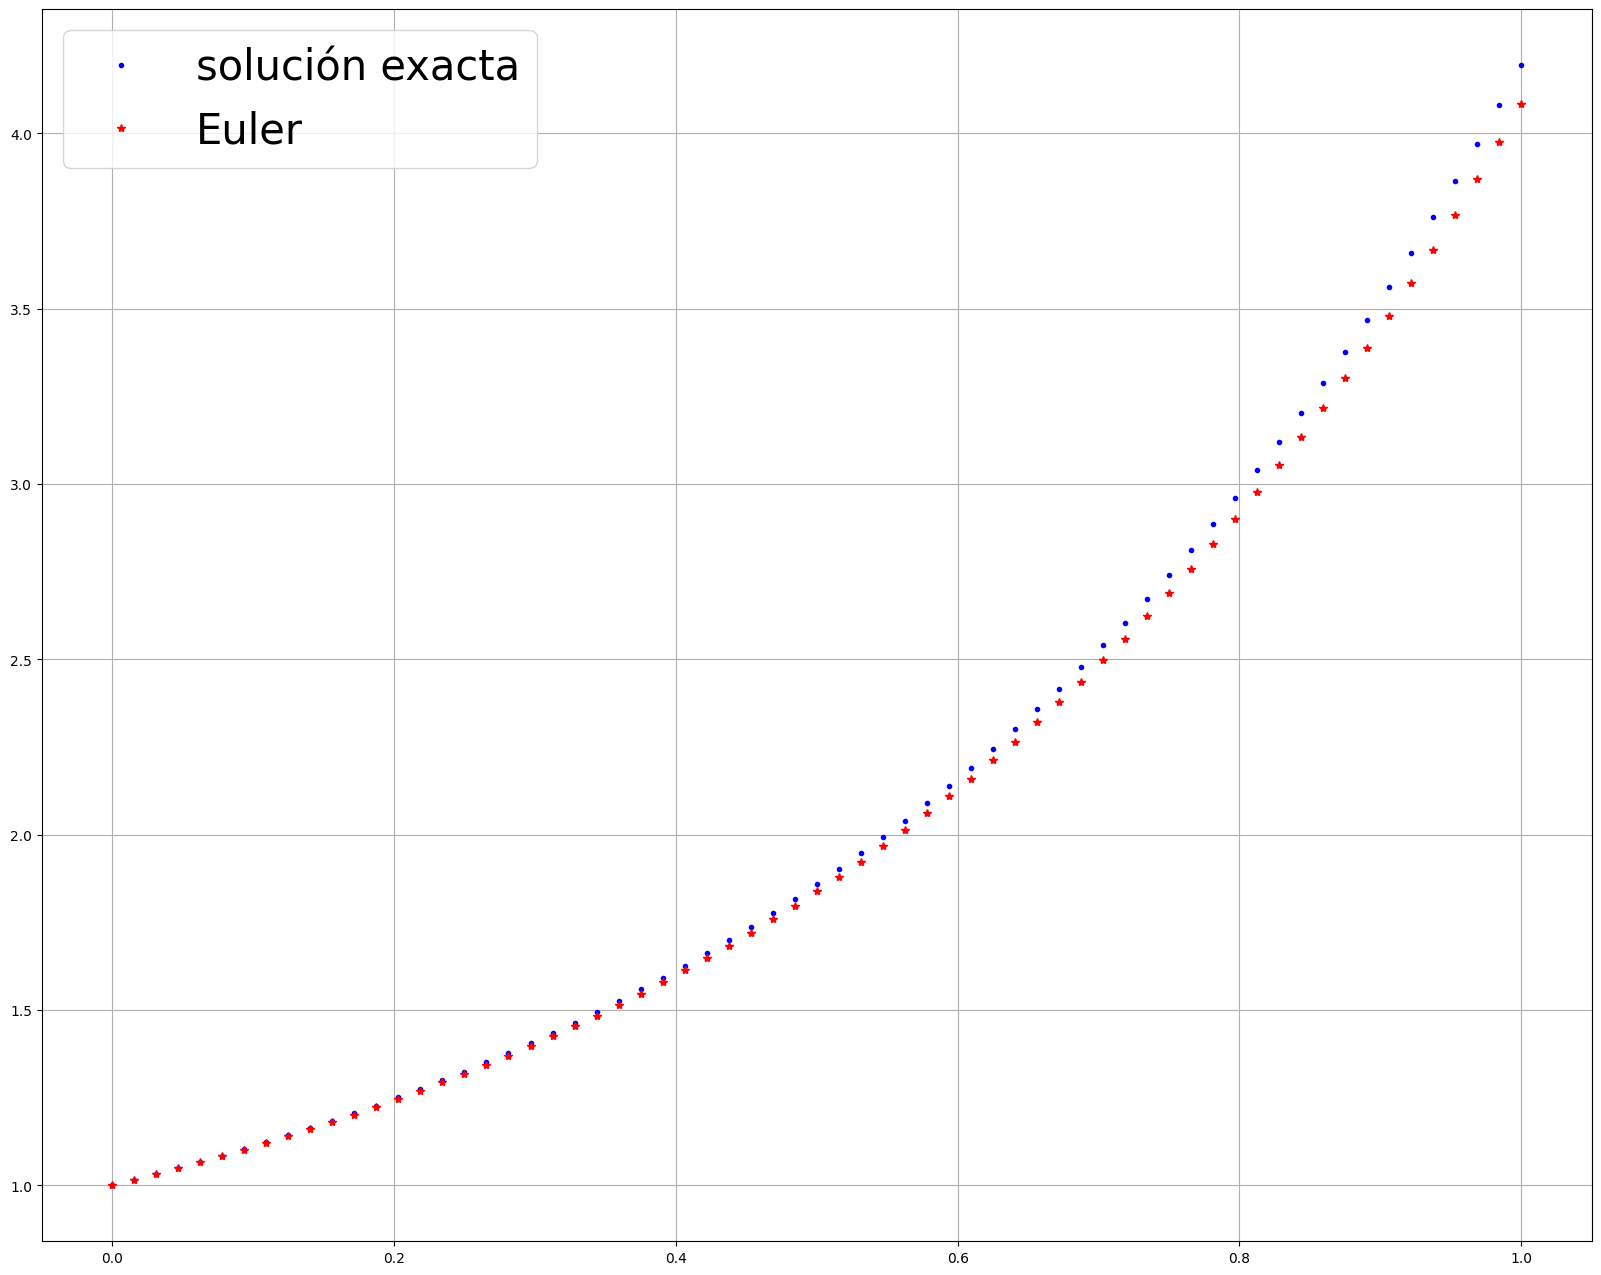

In [8]:
figure(figsize=(20, 16))
plot(us, vs, "b.", label = "solución exacta")
plot(Datos[1], Datos[2], "*r", label = "Euler")
legend(fontsize=30)
grid("on");

## Error vs tamaño de pasos (o número)

El tamaño del error en el Método de Euler para un problema de valor inicial está en proporción al tamaño de paso, o en otras palabras, es inversamente proporcional al numero de pasos que usamos sobre un intervalo fijo.

Es decir $$error \leq C (h)^1$$

Que de hecho, se escribe $$error = O(h) \quad \textrm{como} \quad N \to \infty$$

Nótese que la potencia de $h$ es uno. Decimos que el método de Euler es de orden uno.

### Comparaciones para checar que el método de Euler es de orden uno.

En este punto tengo que escoger una norma para comparar, puedo elegir por ejemplo el máximo sobre **cada punto** el intervalo $x \in [0,1]$

Pero voy a elegir como norma **la diferencia entre la solución exacta y la solución por Euler al tiempo $t=1$**

Entonces voy a crear una función `Euler2`, que solo me devuelve el punto $y(1)$. `Euler2` solo va a depender del número $N$ en que dividí el intervalo.

También hago una función que calcule la solución exacta en el intervalo $[0,1]$ usando $N+1$ puntos. (Dividí al intervalo en $N$ partes iguales). El punto $1$ va a ser $x=0$, el punto $N+1$ va a ser $x=1$. Pero solo nos interesa la solución en el punto $x=1$

In [9]:
function Euler2(f, t0, y0, N)
    h=1/N
    ts = Float64[]
    ys = Float64[]
    t_actual = t0
    y_actual = y0
    push!(ts, t_actual)
    push!(ys, y_actual)
    for j in 1:N
        t_nueva = t_actual + h
        y_nueva = y_actual + f(t_actual, y_actual)*h
        push!(ts, t_nueva)
        push!(ys, y_nueva)
        t_actual = t_nueva
        y_actual = y_nueva
    end
    m = length(ys)
    ys[m]
end

Euler2 (generic function with 1 method)

In [10]:
function solucion_exacta(N)
    us = range(0, stop=1, length=N+1) #Aquí length es el número total de puntos j=0,1,2,...,N (SON N+1 PUNTOS)
    vs = [0.5 + 0.5*exp(2x) for x in us]
    m = length(vs)
    vs[m]
end

solucion_exacta (generic function with 1 method)

In [11]:
NS = [2^x for x in 6:15]
ΔS = [abs(Euler2(f, 0, 1, x) - solucion_exacta(x)) for x in NS]

10-element Array{Float64,1}:
 0.11138997307121468
 0.05669315290111676
 0.02860275009480251
 0.0143662728306726
 0.007199469294396188
 0.003603831525062162
 0.0018029416958302846
 0.0009017275458775842
 0.00045092797429280296
 0.0002254800408918456

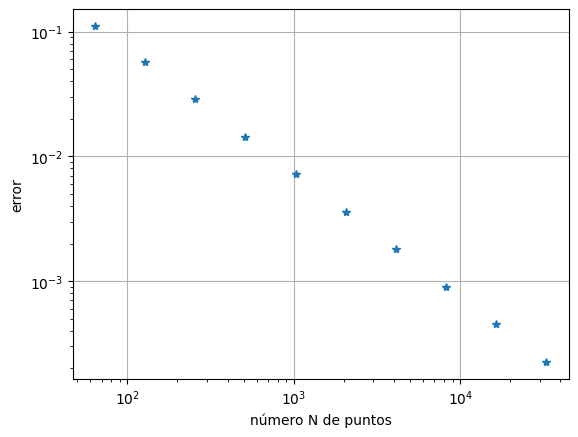

In [12]:
plot(NS, ΔS, "*")
xscale("log")
yscale("log")
xlabel("número N de puntos")
ylabel("error")
grid("on");

In [13]:
HS = [1/(2^x) for x in 6:15]
ERROR = [abs(Euler2(f, 0, 1, x) - solucion_exacta(x)) for x in NS]

10-element Array{Float64,1}:
 0.11138997307121468
 0.05669315290111676
 0.02860275009480251
 0.0143662728306726
 0.007199469294396188
 0.003603831525062162
 0.0018029416958302846
 0.0009017275458775842
 0.00045092797429280296
 0.0002254800408918456

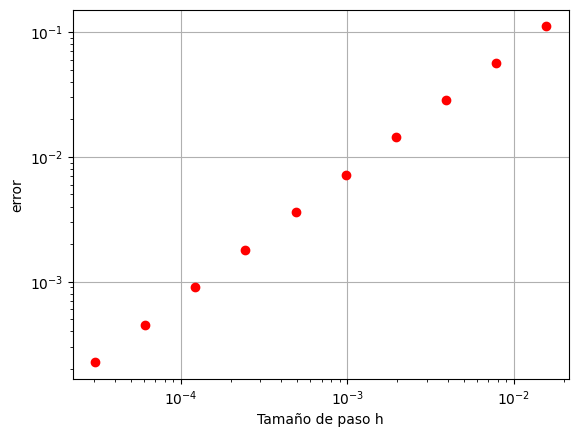

In [14]:
plot(HS, ERROR, "ro")
xscale("log")
yscale("log")
xlabel("Tamaño de paso h")
ylabel("error")
grid("on");

## Conclusión.

Vemos que la gráfica (con escala logarítmica) de los errores (en el punto $x = 1$) es una función lineal, así que el método de Euler es de orden uno.

vemos que el error está arbitrariamente cerca de cero como aumentamos el número de pasos $N$